# Модели сетей

__Авторы задач: Макрушин С.В (SVMakrushin@fa.ru), Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 2: Модели"
* Документация:
    * https://networkx.github.io/documentation/stable/reference/readwrite/index.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html
* Датасеты с сетями:
    * http://networkrepository.com
    * http://konect.cc/networks/
    * https://snap.stanford.edu/data/
    * https://networkdata.ics.uci.edu/resources.php
    * https://kateto.net/2016/05/network-datasets/

## Распределение степеней узлов

1.1 Загрузить большую (с кол-вом узлов `𝑁`>200 ) сеть из внешнего источника. Визуализировать закон распределения степеней узлов в обычной и логарифимических (по 1й и по 2м осям) системах координат.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
G = nx.read_adjlist('out.maayan-pdzbase')

In [ ]:
len(G.nodes)

215

In [ ]:
len(G.edges)

246

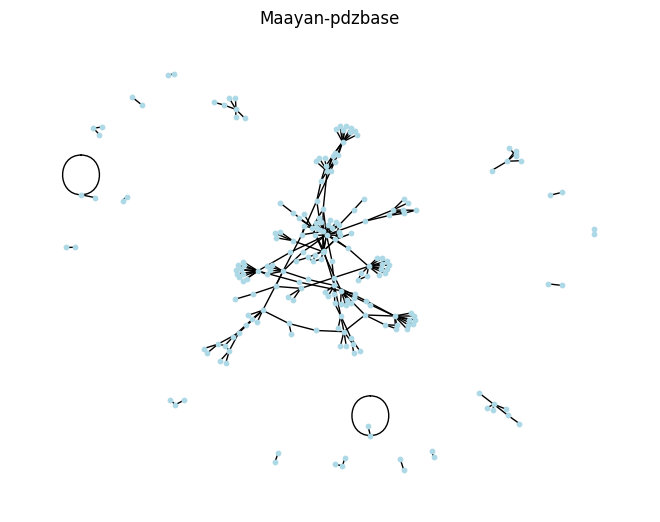

In [ ]:
nx.draw(G, with_labels=False, node_size=10, node_color='lightblue', font_size=10, font_color='black')
plt.title(f"Maayan-pdzbase")
plt.gca().set_aspect('auto')  # Устанавливаем соотношение сторон для правильной решетки
plt.show()

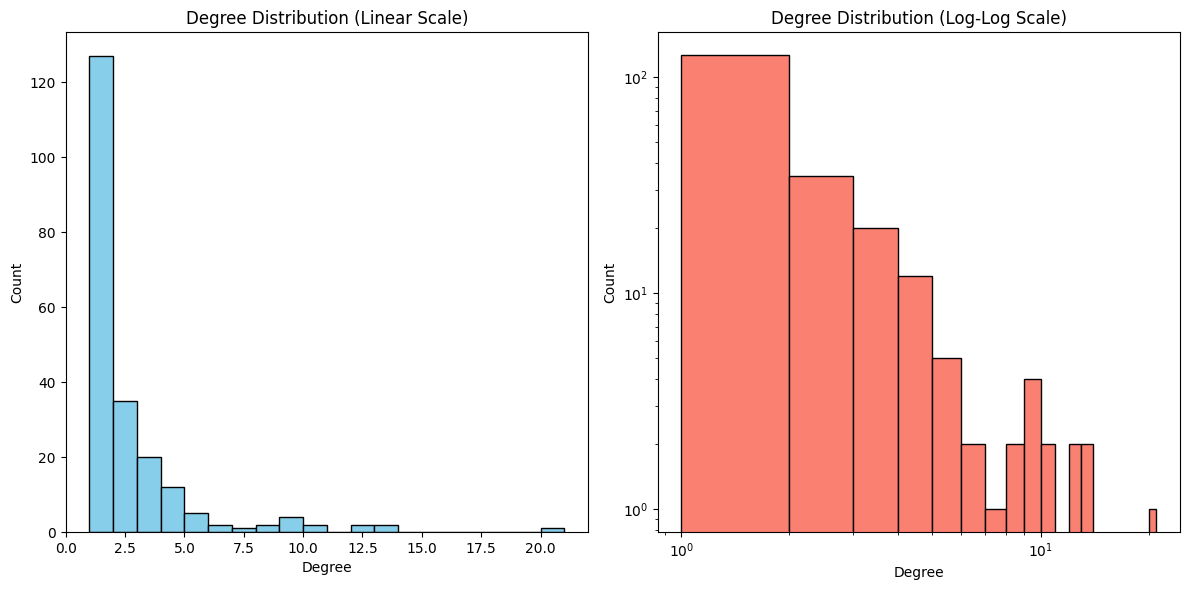

In [ ]:
# Получаем список степеней узлов
degrees = [deg for node, deg in G.degree()]

# Создаем обычный график распределения степеней узлов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(degrees, bins=20, color='skyblue', edgecolor='black')
plt.title('Degree Distribution (Linear Scale)')
plt.xlabel('Degree')
plt.ylabel('Count')

# Создаем логарифмический график распределения степеней узлов по обеим осям
plt.subplot(1, 2, 2)
plt.hist(degrees, bins=20, color='salmon', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title('Degree Distribution (Log-Log Scale)')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


1.2 Построить график выборочной функции распределения степеней узлов для загруженного графа.

In [ ]:
import numpy as np

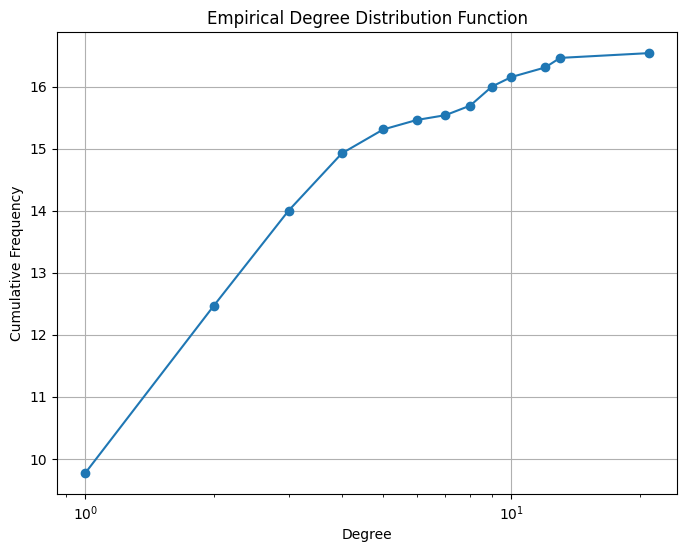

In [ ]:
# Получим список степеней узлов
degrees = [deg for node, deg in G.degree()]

# Посчитаем выборочную функцию распределения
degree_counts = np.unique(degrees, return_counts=True)
degrees = degree_counts[0]
degree_freq = degree_counts[1] / len(degrees)

# Построим график выборочной функции распределения степеней узлов
plt.figure(figsize=(8, 6))
plt.plot(degrees, np.cumsum(degree_freq), marker='o', linestyle='-')
plt.title('Empirical Degree Distribution Function')
plt.xlabel('Degree')
plt.ylabel('Cumulative Frequency')
plt.xscale('log')
plt.grid()
plt.show()

## Модель предпочтительного присоединения

2.1 Используя реализацию модели предпочтительного присоединения Барабаши-Альберта из `networkx`, построить сеть с кол-вом узлов 𝑁>50.

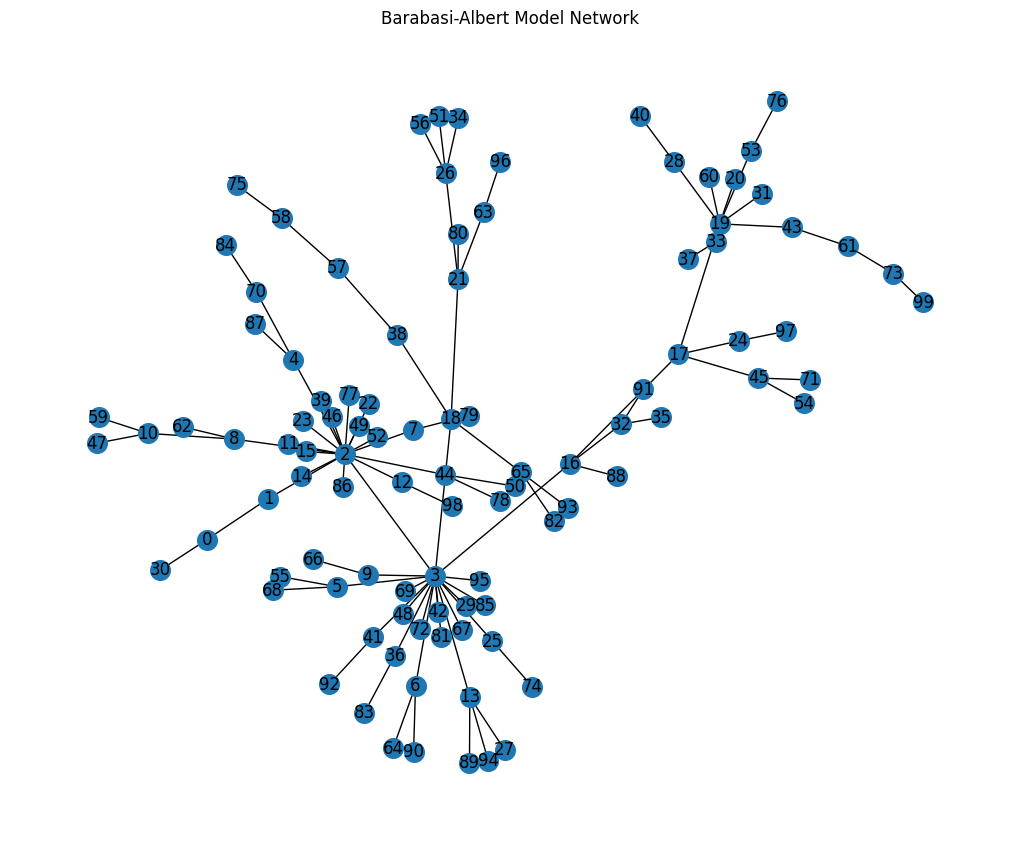

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем пустой граф
G = nx.Graph()

# Добавляем начальные узлы и связи
m = 3
N = 100

for i in range(m):
    G.add_node(i)

for i in range(m):
    G.add_edge(i, i+1)

# Модель Барабаши-Альберта: присоединяем новые узлы с m связями, пропорционально степени узлов
for i in range(m, N):
    new_edges = []
    #for j in range(m):
    #print(f'{i}: {sum(dict(G.degree).values())},  \\\ {dict(G.degree)}')

    # выбираем узел для присоединения пропорционально степени узла
    node = np.random.choice(list(G.nodes()), p=[deg / sum((dict(G.degree).values())) for node, deg in G.degree()])
    new_edges.append((i, node))
    G.add_node(i)
    G.add_edges_from(new_edges)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200)
plt.title("Barabasi-Albert Model Network")
plt.show()


2.2 Создать визуализацию графа, построенного в задаче 2.1, в которой размер и цвет узла определяется его степенью.

<ipython-input-73-7664d2574f6d>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label="Node Degree")


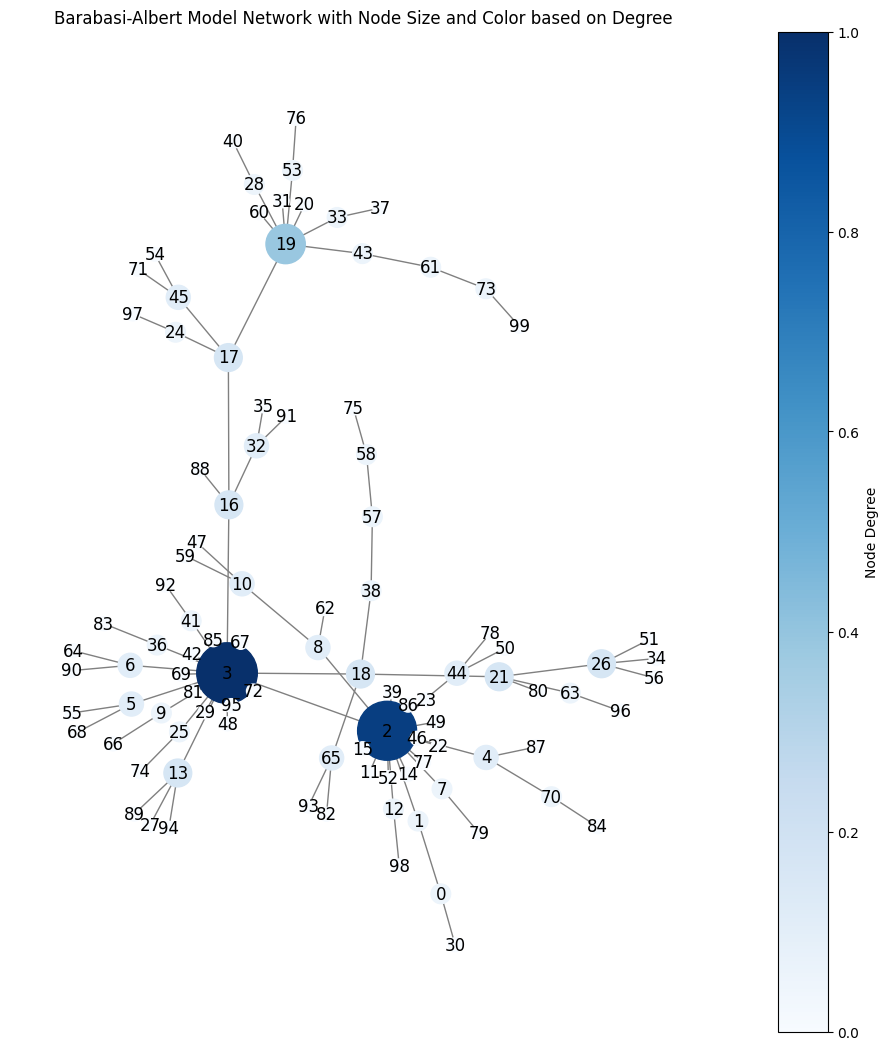

In [ ]:
# Рассчитываем размер и цвет узлов на основе их степени
node_sizes = [deg * 100 for node, deg in G.degree()]  # размер узла пропорционален степени
node_colors = [deg for node, deg in G.degree()]  # цвет узла пропорционален степени

# Рисуем граф с учетом размера и цвета узлов
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)  # позиции узлов для отображения
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues, edge_color='gray')
plt.gca().set_aspect('equal')
plt.title("Barabasi-Albert Model Network with Node Size and Color based on Degree")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label="Node Degree")
plt.show()

2.3 Используя решение задачи 2.1, построить сеть с кол-вом узлов `N=10000`. Визуализировать закон распределения степеней узлов сети в обычной и логарифимических (по 1й и по 2м осям) системах координат. Построить график выборочной функции распределения степеней узлов для сети из задания 2.1.

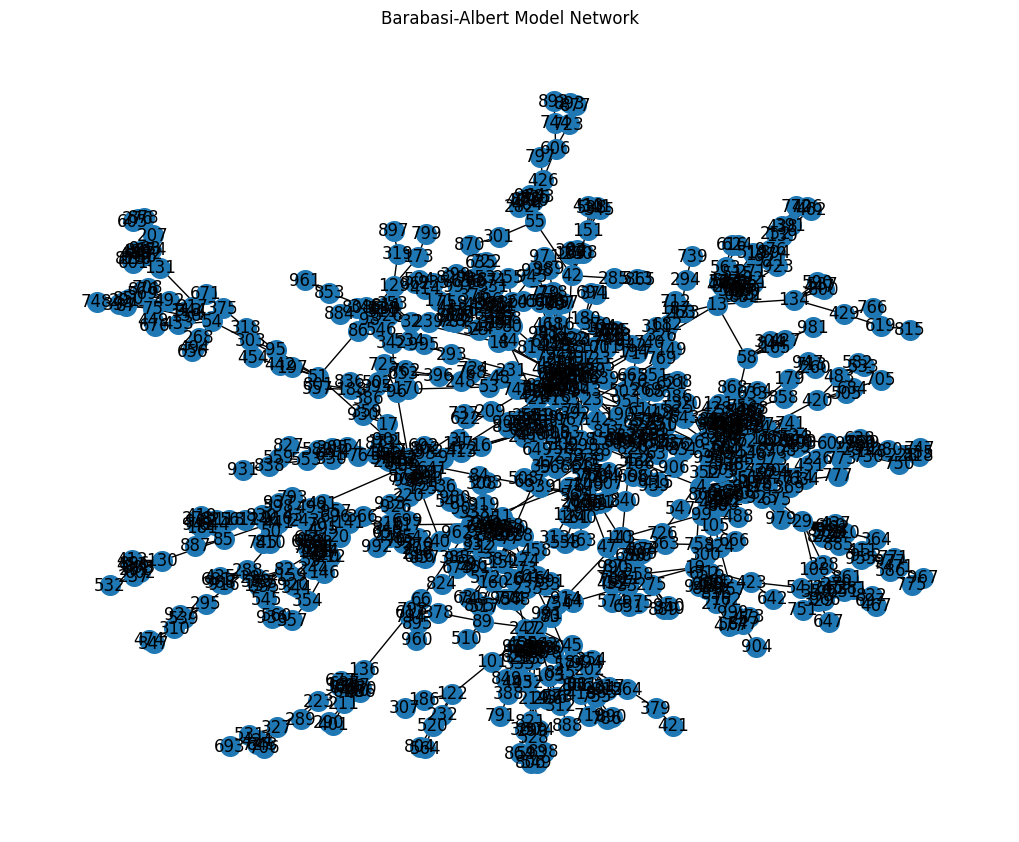

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем пустой граф
G = nx.Graph()

# Добавляем начальные узлы и связи
m = 3
N = 1000

for i in range(m):
    G.add_node(i)

for i in range(m):
    G.add_edge(i, i+1)

# Модель Барабаши-Альберта: присоединяем новые узлы с m связями, пропорционально степени узлов
for i in range(m, N):
    new_edges = []
    #for j in range(m):
    #print(f'{i}: {sum(dict(G.degree).values())},  \\\ {dict(G.degree)}')

    # выбираем узел для присоединения пропорционально степени узла
    node = np.random.choice(list(G.nodes()), p=[deg / sum((dict(G.degree).values())) for node, deg in G.degree()])
    new_edges.append((i, node))
    G.add_node(i)
    G.add_edges_from(new_edges)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200)
plt.title("Barabasi-Albert Model Network")
plt.show()


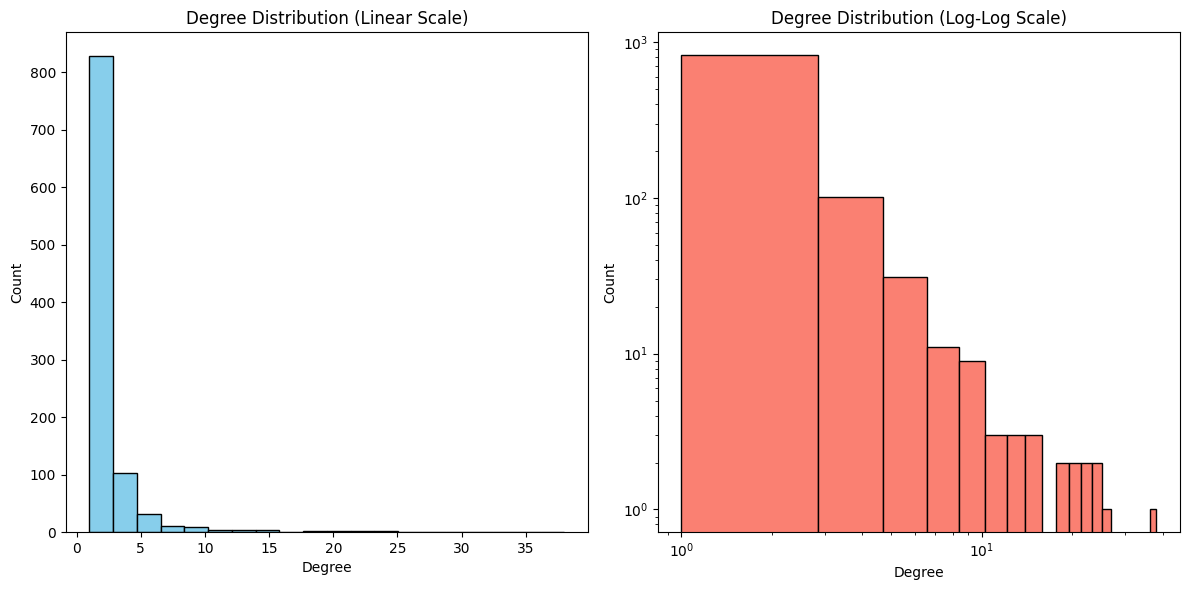

In [ ]:
# Получаем список степеней узлов
degrees = [deg for node, deg in G.degree()]

# Создаем обычный график распределения степеней узлов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(degrees, bins=20, color='skyblue', edgecolor='black')
plt.title('Degree Distribution (Linear Scale)')
plt.xlabel('Degree')
plt.ylabel('Count')

# Создаем логарифмический график распределения степеней узлов по обеим осям
plt.subplot(1, 2, 2)
plt.hist(degrees, bins=20, color='salmon', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title('Degree Distribution (Log-Log Scale)')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


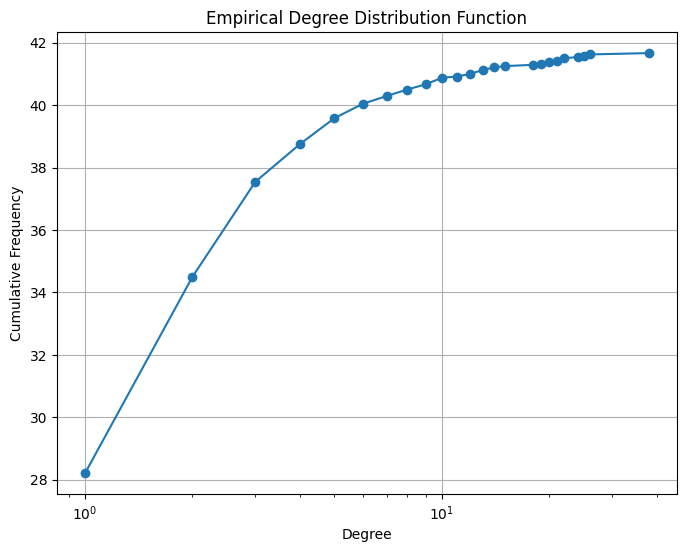

In [ ]:
# Получим список степеней узлов
degrees = [deg for node, deg in G.degree()]

# Посчитаем выборочную функцию распределения
degree_counts = np.unique(degrees, return_counts=True)
degrees = degree_counts[0]
degree_freq = degree_counts[1] / len(degrees)

# Построим график выборочной функции распределения степеней узлов
plt.figure(figsize=(8, 6))
plt.plot(degrees, np.cumsum(degree_freq), marker='o', linestyle='-')
plt.title('Empirical Degree Distribution Function')
plt.xlabel('Degree')
plt.ylabel('Cumulative Frequency')
plt.xscale('log')
plt.grid()
plt.show()

2.4. Визуализировать закон распределения степеней узлов с использованием log-binning для сети из 2.3. Для сравнения на этом же графике изобразите график закона распределения без использования log-binning в log-log координатах.

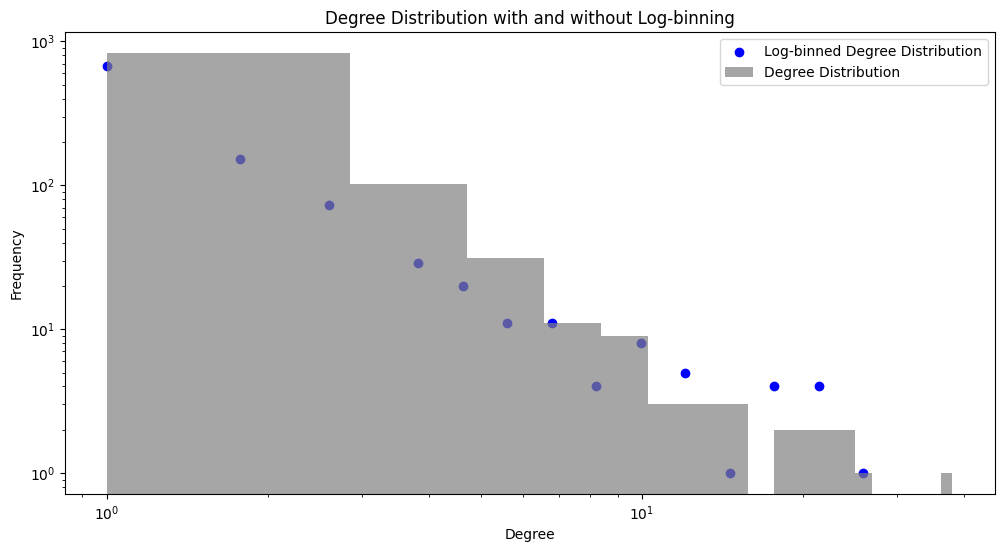

In [ ]:
# Получаем степени узлов
degrees = dict(G.degree())
degree_values = list(degrees.values())

# Log-binning: разбиваем степени узлов на бины с логарифмическим масштабом
log_degree_values = np.log10(degree_values)
bins = np.logspace(np.log10(min(degree_values)), np.log10(max(degree_values)), num=20)
hist, _ = np.histogram(degree_values, bins=bins)

# График закона распределения с использованием log-binning
plt.figure(figsize=(12, 6))
plt.scatter(bins[:-1], hist, color='blue', label='Log-binned Degree Distribution')
plt.xscale('log')
plt.yscale('log')

# График закона распределения без использования log-binning
plt.hist(degree_values, bins=20, color='gray', alpha=0.7, label='Degree Distribution')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution with and without Log-binning')
plt.legend()
plt.show()

2.5 Реализовать алгоритм предпочтительного присоединения с целочисленными параметрами  `n0`, `m` ,`𝑡`:

* `n0`  - количество узлов в исходной сети (считаем, что исходная сеть является полным графом);
* `m`  - количество связей у каждого вновь добавляемого узла;
* `𝑡`   - количество итераций по добоавлению нового узла.

Проверить корректность алгоритма с помощью анализа распределения степеней узлов сгенерированной сети.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def create_bebroshi_graph(n0, m, t):
# Создаем пустой граф
  G = nx.complete_graph(n0)

  N = t  # общее количество узлов

  # Модель Барабаши-Альберта: присоединяем новые узлы с m связями, пропорционально степени узлов
  for i in range(m, N):
      new_edges = []
      for j in range(m):
          # выбираем узел для присоединения пропорционально степени узла
          node = np.random.choice(list(G.nodes()), p=[deg / sum((dict(G.degree).values())) for node, deg in G.degree()])
          new_edges.append((i, node))
      G.add_node(i)
      G.add_edges_from(new_edges)

  # Рисуем граф
  plt.figure(figsize=(10, 8))
  pos = nx.spring_layout(G)  # позиции узлов для отображения
  nx.draw(G, pos, with_labels=True, node_size=200)
  plt.title("Barabasi-Albert Model Network")
  plt.show()
  return G

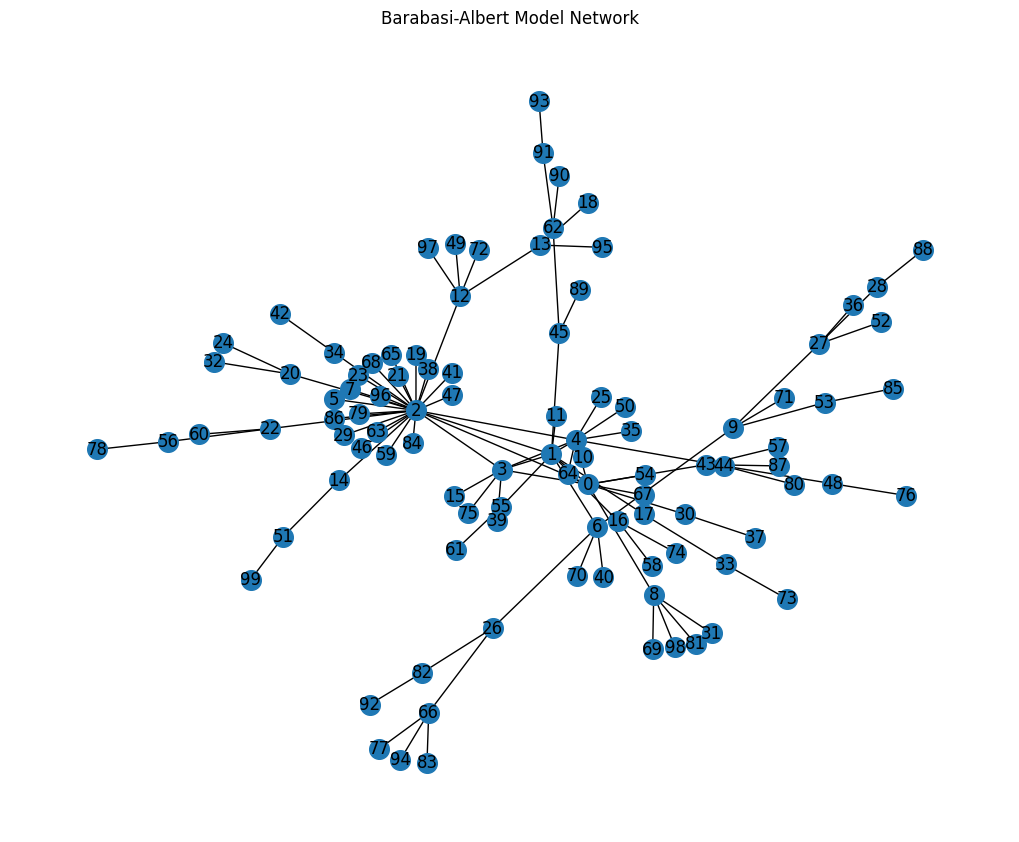

In [ ]:
G = create_bebroshi_graph(5, 1, 100)

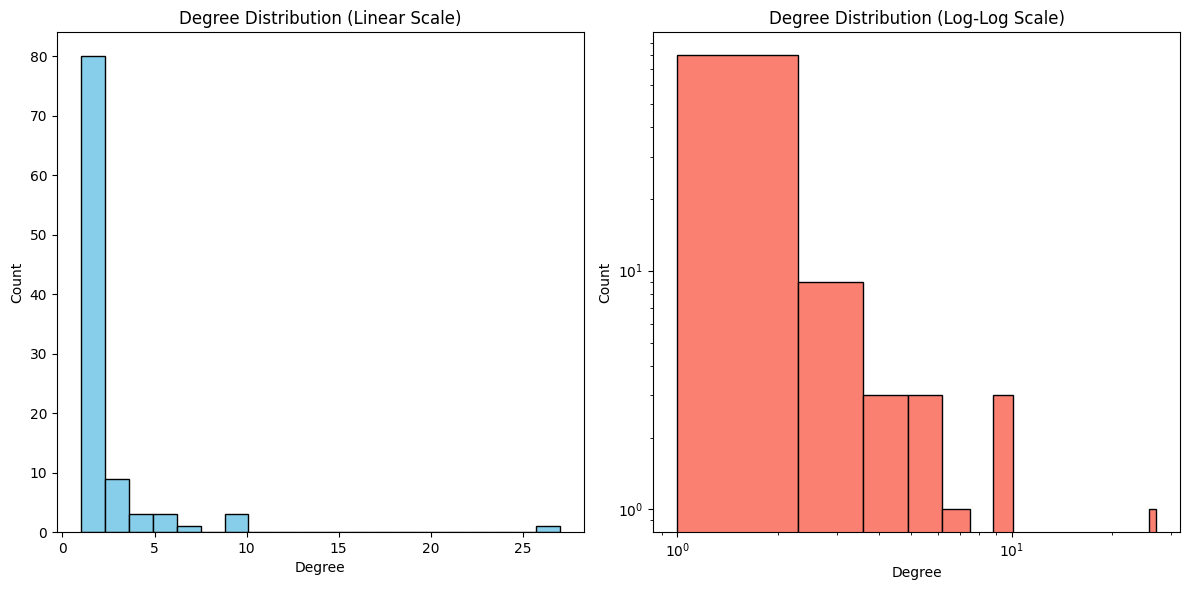

In [ ]:
# Получаем список степеней узлов
degrees = [deg for node, deg in G.degree()]

# Создаем обычный график распределения степеней узлов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(degrees, bins=20, color='skyblue', edgecolor='black')
plt.title('Degree Distribution (Linear Scale)')
plt.xlabel('Degree')
plt.ylabel('Count')

# Создаем логарифмический график распределения степеней узлов по обеим осям
plt.subplot(1, 2, 2)
plt.hist(degrees, bins=20, color='salmon', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title('Degree Distribution (Log-Log Scale)')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

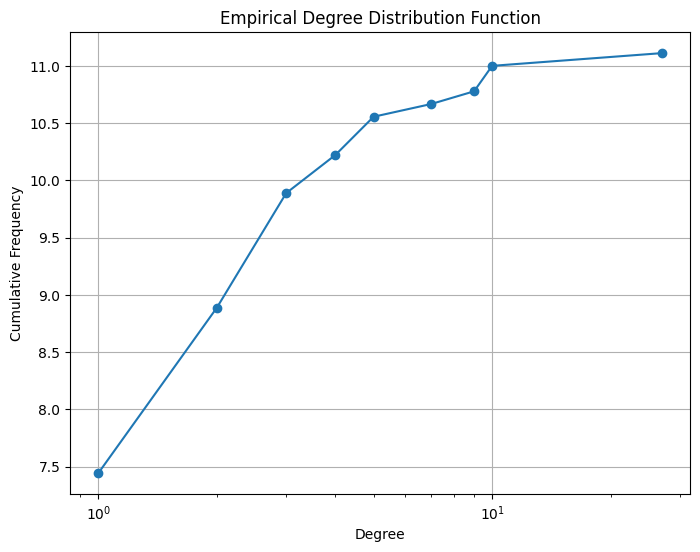

In [ ]:
# Получим список степеней узлов
degrees = [deg for node, deg in G.degree()]

# Посчитаем выборочную функцию распределения
degree_counts = np.unique(degrees, return_counts=True)
degrees = degree_counts[0]
degree_freq = degree_counts[1] / len(degrees)

# Построим график выборочной функции распределения степеней узлов
plt.figure(figsize=(8, 6))
plt.plot(degrees, np.cumsum(degree_freq), marker='o', linestyle='-')
plt.title('Empirical Degree Distribution Function')
plt.xlabel('Degree')
plt.ylabel('Cumulative Frequency')
plt.xscale('log')
plt.grid()
plt.show()

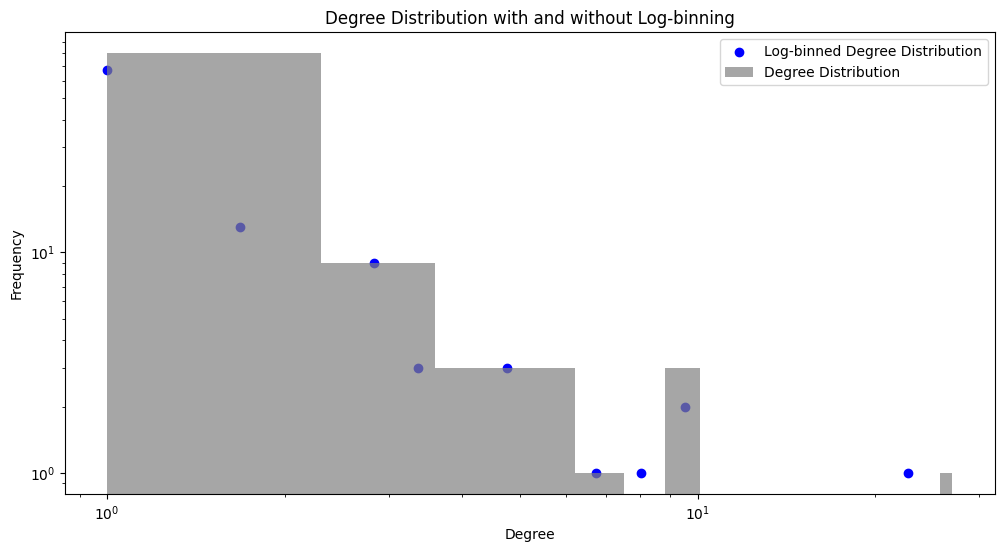

In [ ]:
# Получаем степени узлов
degrees = dict(G.degree())
degree_values = list(degrees.values())

# Log-binning: разбиваем степени узлов на бины с логарифмическим масштабом
log_degree_values = np.log10(degree_values)
bins = np.logspace(np.log10(min(degree_values)), np.log10(max(degree_values)), num=20)
hist, _ = np.histogram(degree_values, bins=bins)

# График закона распределения с использованием log-binning
plt.figure(figsize=(12, 6))
plt.scatter(bins[:-1], hist, color='blue', label='Log-binned Degree Distribution')
plt.xscale('log')
plt.yscale('log')

# График закона распределения без использования log-binning
plt.hist(degree_values, bins=20, color='gray', alpha=0.7, label='Degree Distribution')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution with and without Log-binning')
plt.legend()
plt.show()

## Модель тесного мира Уотса-Строгатса

3.1 C помощью реализации модели Уотса-Строгатса из `networkx` сгенерировать небольшие сети с разным `p` и визуализировать их. При визуализации зафиксировать положение узлов всех графов.

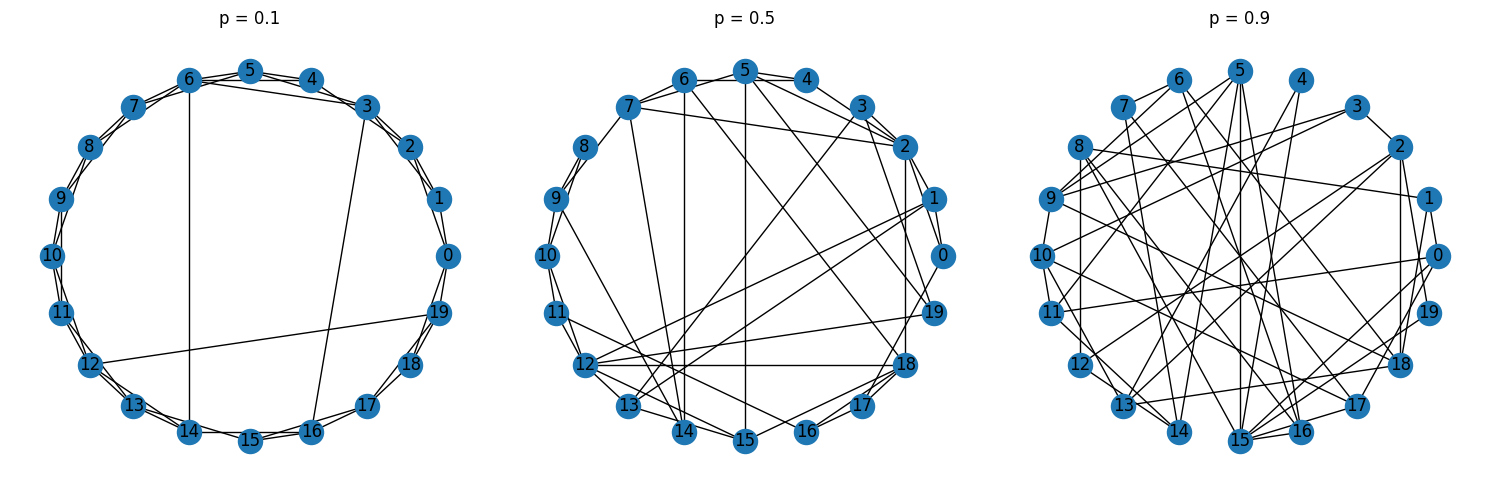

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем графы с разными значениями параметра p
G1 = nx.watts_strogatz_graph(20, 4, 0.1)  # p = 0.1
G2 = nx.watts_strogatz_graph(20, 4, 0.5)  # p = 0.5
G3 = nx.watts_strogatz_graph(20, 4, 0.9)  # p = 0.9

# Фиксируем положение узлов для последующей визуализации
pos = nx.circular_layout(G1)

# Визуализируем графы
plt.figure(figsize=(15, 5))

plt.subplot(131)
nx.draw(G1, pos, with_labels=True)
plt.title("p = 0.1")

plt.subplot(132)
nx.draw(G2, pos, with_labels=True)
plt.title("p = 0.5")

plt.subplot(133)
nx.draw(G3, pos, with_labels=True)
plt.title("p = 0.9")

plt.tight_layout()
plt.show()

3.2 C помощью реализации модели Уотса-Строгатса из networkx сети с кол-вом узлов порядка 1000 и с разным p. Визуализировать результаты пересвязывания, построить на одном графике относительные изменения среднего коэффициента кластеризации и средней длины пути относительно варианта сети без пересвязывания.

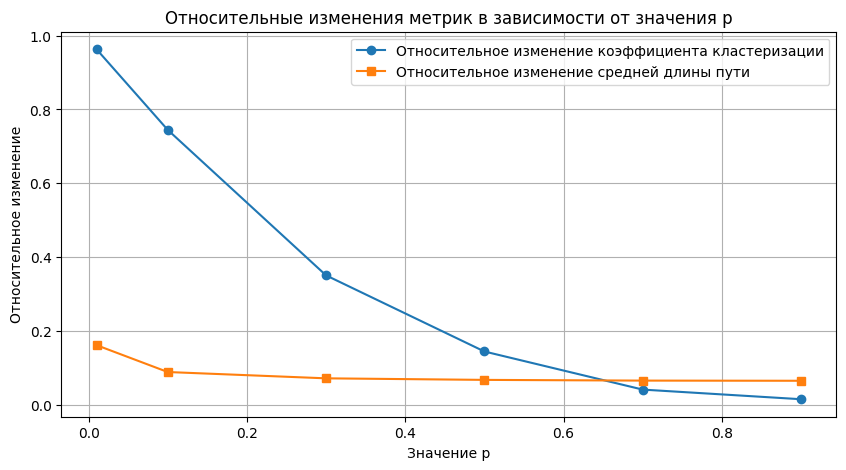

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем исходную сеть без пересвязывания
G_original = nx.watts_strogatz_graph(1000, 10, 0)

# Сохраняем средний коэффициент кластеризации и среднюю длину пути для исходной сети
clustering_coeff_original = nx.average_clustering(G_original)
avg_shortest_path_length_original = nx.average_shortest_path_length(G_original)

# Создаем сети с разными значениями параметра p
p_values = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9]
clustering_coeffs = []
avg_shortest_path_lengths = []

for p in p_values:
    G = nx.watts_strogatz_graph(1000, 10, p)
    clustering_coeffs.append(nx.average_clustering(G) / clustering_coeff_original)
    avg_shortest_path_lengths.append(nx.average_shortest_path_length(G) / avg_shortest_path_length_original)

# Визуализируем относительные изменения среднего коэффициента кластеризации и средней длины пути
plt.figure(figsize=(10, 5))

plt.plot(p_values, clustering_coeffs, marker='o', label='Относительное изменение коэффициента кластеризации')
plt.plot(p_values, avg_shortest_path_lengths, marker='s', label='Относительное изменение средней длины пути')

plt.xlabel('Значение p')
plt.ylabel('Относительное изменение')
plt.title('Относительные изменения метрик в зависимости от значения p')
plt.legend()
plt.grid(True)
plt.show()


## Случайные сети

4.1 C помощью `nx.configuration_model` построить рандомизированный аналог одной из небольших реальных сетей, загруженной из датасетов. Визуализируйте исходный и рандомизированный граф рядом.

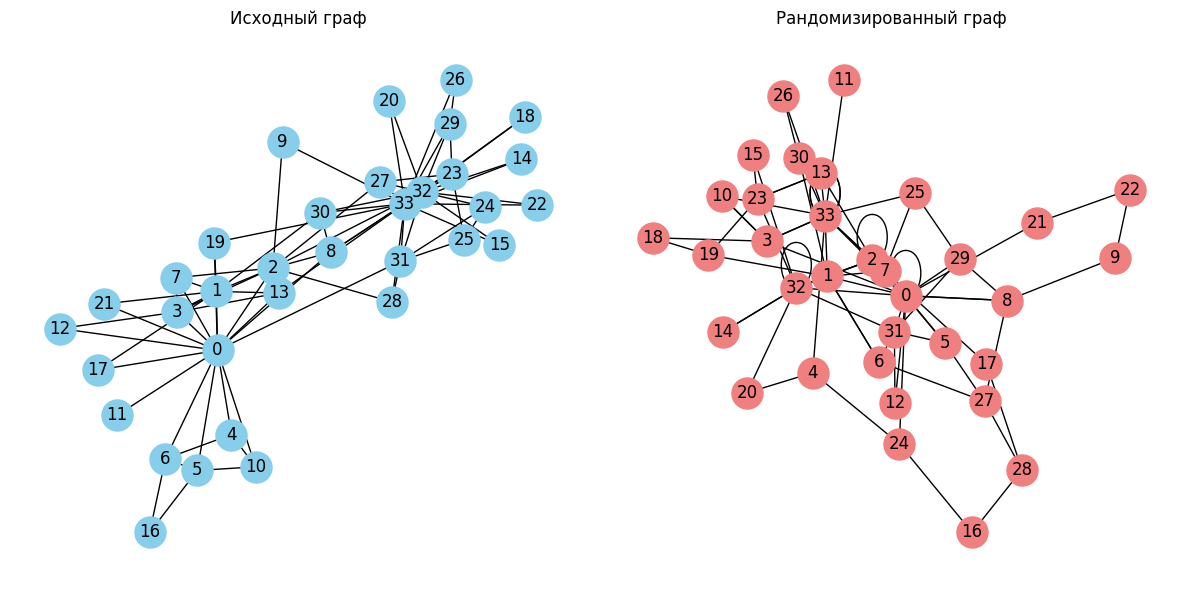

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Загружаем граф "karate_club"
G = nx.karate_club_graph()


# Создаем рандомизированный аналог с помощью configuration model
randomized_G = nx.configuration_model(list(dict(G.degree()).values()))

# Визуализируем исходный и рандомизированный графы рядом
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.title('Исходный граф')
nx.draw(G, with_labels=True, node_color='skyblue', node_size=500)

plt.subplot(122)
plt.title('Рандомизированный граф')
nx.draw(randomized_G, with_labels=True, node_color='lightcoral', node_size=500)

plt.tight_layout()
plt.show()


4.2 Проверьте, совпадают ли распределения степеней узлов исходного и рандомизированного графа.

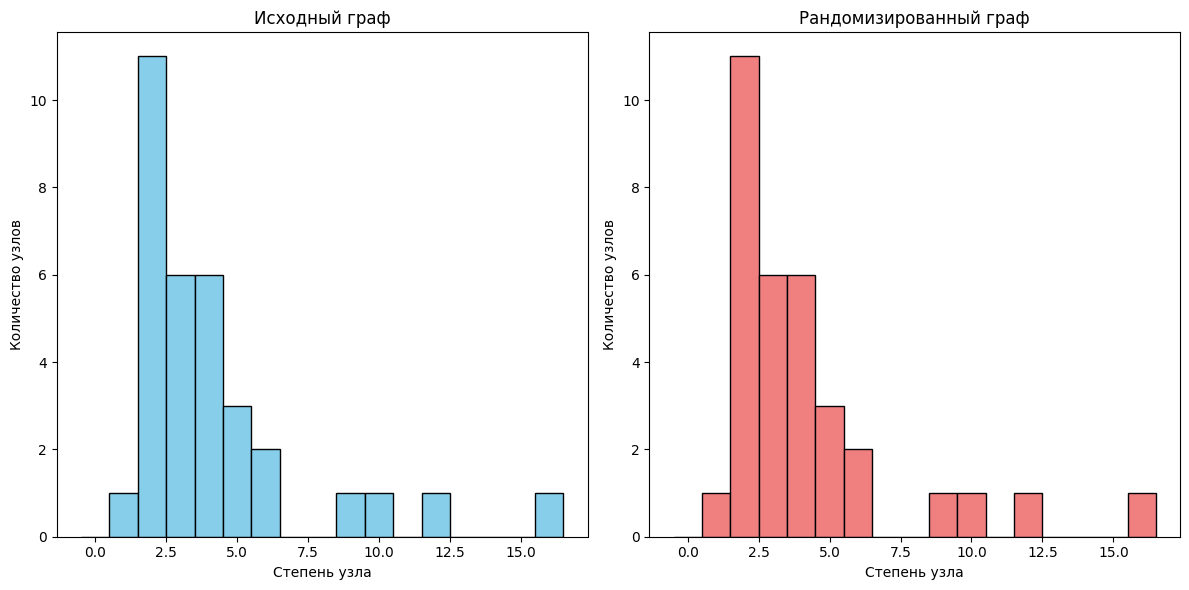

In [ ]:
# Получаем степени узлов исходного и рандомизированного графов
degrees_G = [d for n, d in G.degree()]
degrees_randomized_G = [d for n, d in randomized_G.degree()]

# Построим гистограммы степеней узлов
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.title('Исходный граф')
plt.hist(degrees_G, bins=np.arange(0, max(degrees_G)+1)-0.5, color='skyblue', edgecolor='black')
plt.xlabel('Степень узла')
plt.ylabel('Количество узлов')

plt.subplot(122)
plt.title('Рандомизированный граф')
plt.hist(degrees_randomized_G, bins=np.arange(0, max(degrees_randomized_G)+1)-0.5, color='lightcoral', edgecolor='black')
plt.xlabel('Степень узла')
plt.ylabel('Количество узлов')

plt.tight_layout()
plt.show()
